# Práctica 3

# Dataset 3

# Limpieza de datos

Se propone hacer el EDA del dataset traffic-collision-data-from-2010-to-present. El presente dataset describe los incidentes automóvilisticos en la ciudad de los Angeles desde 2010. Consultado en: https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data

## Data Exploration

Importamos los módulos necesarios.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

In [4]:
traffic_collision = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')
traffic_collision.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,...,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,...,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,...,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,0605,...,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,...,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0


In [5]:
# shape and data types of the data
print('El número de registros en el dataset es: '+ str(traffic_collision.shape[0]) + ' y el número de atributos es: ' + str(traffic_collision.shape[1])+'.')

El número de registros en el dataset es: 502858 y el número de atributos es: 24.


In [6]:
pd.DataFrame(traffic_collision.dtypes, columns=['Type'])

,Type
DR Number,int64
Date Reported,object
Date Occurred,object
Time Occurred,int64
Area ID,int64
Area Name,object
Reporting District,int64
Crime Code,int64
Crime Code Description,object
MO Codes,object


Selección de columnas con variables numéricas

In [7]:
traffic_collision_numericas = traffic_collision.select_dtypes(include=[np.number])
cols_numericas = traffic_collision_numericas.columns.values
print(cols_numericas)

['DR Number' 'Time Occurred' 'Area ID' 'Reporting District' 'Crime Code'
 'Victim Age' 'Premise Code' 'Zip Codes' 'Census Tracts'
 'Precinct Boundaries' 'LA Specific Plans' 'Council Districts'
 'Neighborhood Councils (Certified)']


Selección de columnas con variables categóricas

In [8]:
traffic_collision_no_numericas = traffic_collision.select_dtypes(exclude=[np.number])
cols_no_numericas = traffic_collision_no_numericas.columns.values
print(cols_no_numericas)

['Date Reported' 'Date Occurred' 'Area Name' 'Crime Code Description'
 'MO Codes' 'Victim Sex' 'Victim Descent' 'Premise Description' 'Address'
 'Cross Street' 'Location']


## Datos faltantes

### Técnica #1: mapa de calor de los datos faltantes

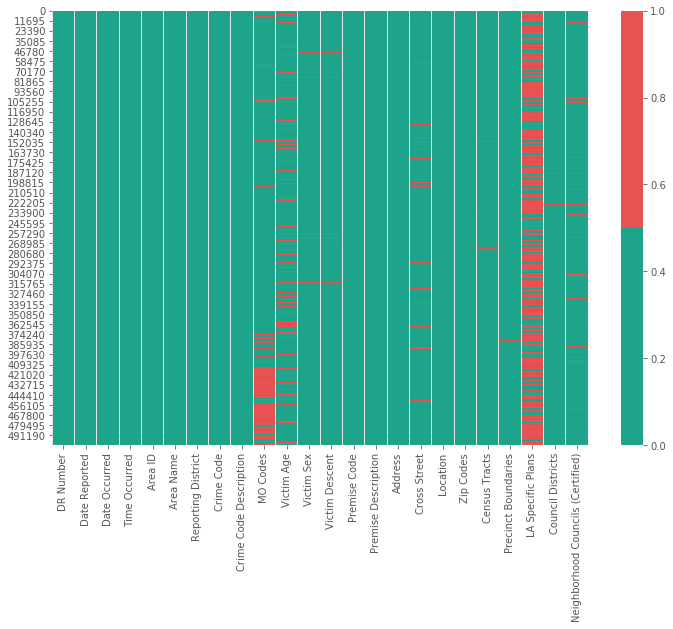

In [9]:
columnas = traffic_collision.columns
colores = ['#1EA48A', '#E65352'] #Red is missing. Blue is not missing.
sns.heatmap(traffic_collision[columnas].isnull(), cmap=sns.color_palette(colores))

Observación: Podemos observar que en los siguientes atributos es donde tenemos falta de registro, ordenado por magnitud de menor a mayor y por medio de esta visualización: Precinct Boundaries, Cross Street, Victim Descent, Victim Age (Estos ultimos dos, cuando falta uno también falta el otro), Neighborhood Councils, Victim Age (tal vez por cuestiones de privacidad, hay que verificar con la fuente oficial, MO Codes y LA Specific Plans.

### Técnica #2: Lista de porcentaje de datos faltantes

In [10]:
columnas_missing=[]
porcentaje_missing=[]
for col in columnas:
    porcentaje_missing_values = np.mean(traffic_collision[col].isnull())
    if (porcentaje_missing_values > 0):
        columnas_missing.append(col)
        porcentaje_missing.append(str(round(porcentaje_missing_values*100))+'%')
        
traffic_collision_faltantes = pd.DataFrame(data=np.c_[columnas_missing, porcentaje_missing], columns=['Atributo', 'Porcentaje valores faltantes'])
traffic_collision_faltantes

,Atributo,Porcentaje valores faltantes
0,MO Codes,17.0%
1,Victim Age,16.0%
2,Victim Sex,2.0%
3,Victim Descent,2.0%
4,Premise Code,0.0%
5,Premise Description,0.0%
6,Cross Street,5.0%
7,Zip Codes,0.0%
8,Census Tracts,1.0%
9,Precinct Boundaries,1.0%


Aquí verficiamosel porcentaje de missings en los features, un medio más efectivo que el de visualización.

### Técnica #3: Histograma de datos faltantes

Indicador faltante creado para: MO Codes
Indicador faltante creado para: Victim Age
Indicador faltante creado para: Victim Sex
Indicador faltante creado para: Victim Descent
Indicador faltante creado para: Premise Code
Indicador faltante creado para: Premise Description
Indicador faltante creado para: Cross Street
Indicador faltante creado para: Zip Codes
Indicador faltante creado para: Census Tracts
Indicador faltante creado para: Precinct Boundaries
Indicador faltante creado para: LA Specific Plans
Indicador faltante creado para: Council Districts
Indicador faltante creado para: Neighborhood Councils (Certified)


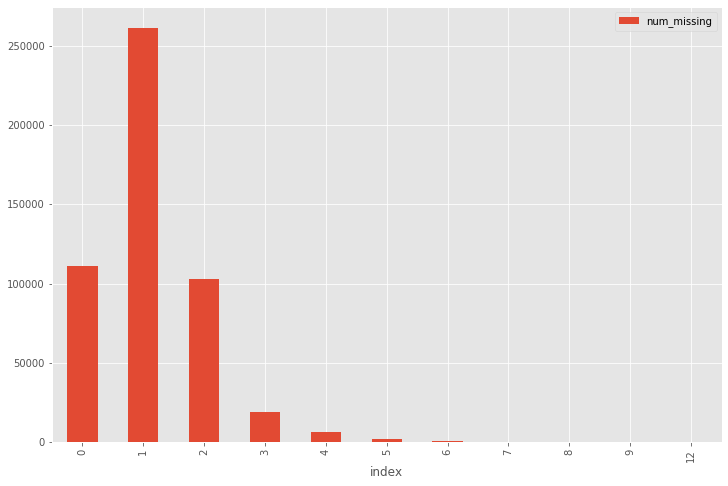

In [12]:
# first create missing indicator for features with missing data
for col in traffic_collision.columns:
    #Crea un arreglo con T/F donde T es que hay un nulo, después lo suma.
    missing = traffic_collision[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Indicador faltante creado para: {}'.format(col))
        traffic_collision['{}_tiene_faltantes'.format(col)] = missing
        
# Basado en el indicador anterior, se crea la gráfica 
ismissing_cols = [col for col in traffic_collision.columns if 'tiene_faltantes' in col]
traffic_collision['num_missing'] = traffic_collision[ismissing_cols].sum(axis=1)

traffic_collision['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()

## Técnicas para tratar con los valores atípicos

### Técnica #1: Histograma y Box Plot

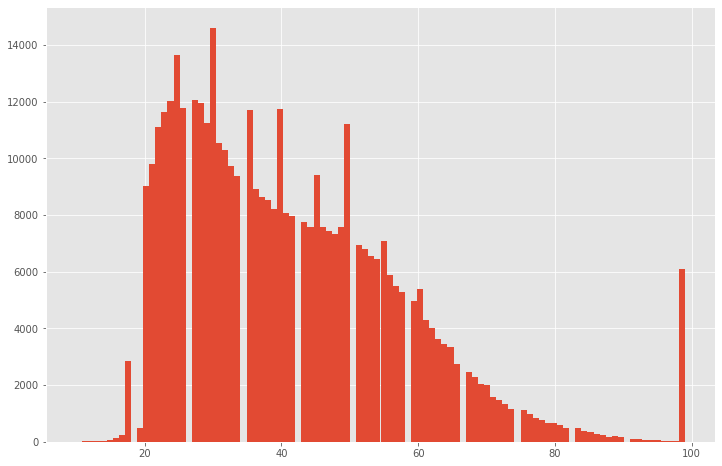

In [15]:
traffic_collision['Victim Age'].hist(bins=100)
plt.show()

En la figura anterior, se observa que que hay una cantidad de personas reportadas en un accidente vial con edad 100, habría que verificar si la edad mencionada está bien reportada.

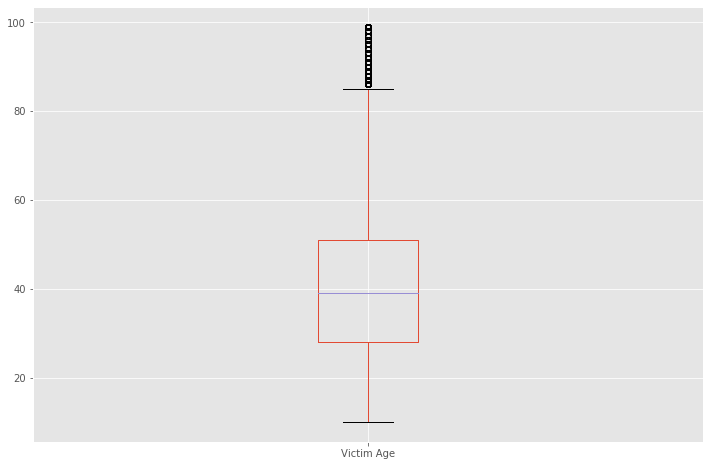

In [16]:
traffic_collision.boxplot(column=['Victim Age'])
plt.show()

Podemos observar que tenemos 'outliers' después del cuantil 75%, estos deben ser los que ocupan la última barra en el histograma pasado.

### Técnica #2: Estadística descriptiva

In [17]:
traffic_collision['Victim Age'].describe()

count    424144.000000
mean         41.425862
std          16.227330
min          10.000000
25%          28.000000
50%          39.000000
75%          51.000000
max          99.000000
Name: Victim Age, dtype: float64

El dato que se posiciona en el cuartil 75% es de 51 años, mientras que el máximo es de 99. 

### Técnica #3: Gráfico de barras

Este es el ejemplo de una variable categórica.

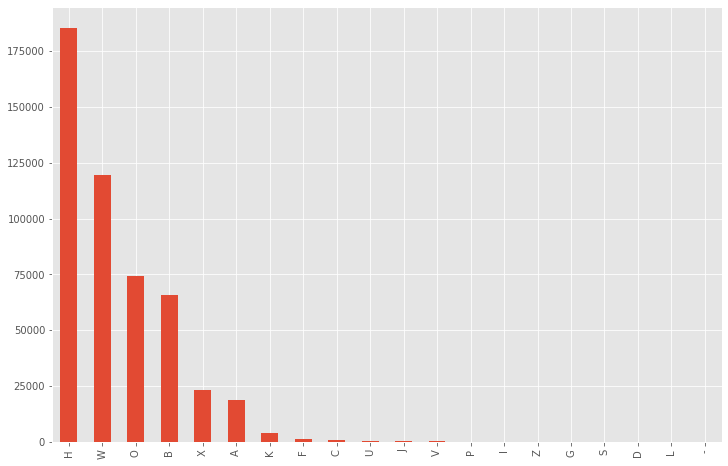

In [18]:
traffic_collision['Victim Descent'].value_counts().plot.bar()
plt.show()

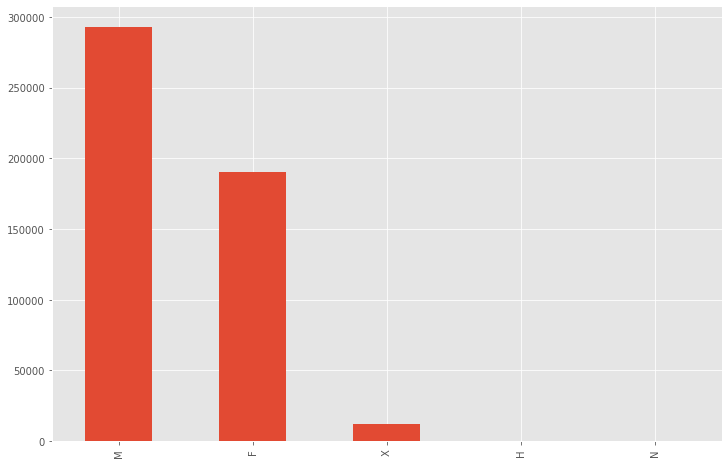

In [20]:
traffic_collision['Victim Sex'].value_counts().plot.bar()
plt.show()

## ¿Qué hacer con los valores atípicos?


Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos. Depende en gran medida del conjunto de datos y del objetivo del proyecto. Los métodos para manejar los valores atípicos son algo similar a los datos que faltan. O bien los eliminamos, los ajustamos o los conservamos.

## Datos innecesarios

Todos los datos que se introduzcan en el modelo deberían servir para el propósito del proyecto. Los datos innecesarios son cuando los datos no añaden valor. Cubrimos tres tipos principales de datos innecesarios debido a diferentes razones.

### Tipo innecesario #1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas observaciones que tienen el mismo valor

In [21]:
num_filas = len(traffic_collision.index)
low_information_cols = [] #

for col in traffic_collision.columns:
    cnts = traffic_collision[col].value_counts(dropna=False)
    top_pct = (cnts/num_filas).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Crime Code: 100.00000%
997    502858
Name: Crime Code, dtype: int64

Crime Code Description: 100.00000%
TRAFFIC COLLISION    502858
Name: Crime Code Description, dtype: int64

Premise Code: 95.39651%
101.0    479709
108.0     16206
102.0      2497
103.0       872
104.0       842
110.0       468
501.0       325
301.0       317
212.0       170
707.0       141
710.0       135
116.0       107
105.0       100
109.0        98
107.0        95
502.0        84
123.0        80
726.0        69
203.0        66
210.0        39
121.0        30
122.0        27
NaN          26
202.0        18
721.0        18
704.0        17
142.0        15
215.0        15
720.0        13
708.0        13
          ...  
407.0         1
718.0         1
204.0         1
253.0         1
222.0         1
239.0         1
119.0         1
937.0         1
206.0         1
220.0         1
115.0         1
408.0         1
228.0         1
901.0         1
112.0         1
211.0         1
719.0         1
834.0         1
411.0         1


¿Qué hacer?
Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas. En este aso, Crime Code tiene el mismo código en el 100% de las tuplas, el 997. Podemos descartarlo pues es un atributo homogéneo. Así mismo con Crime Code Description con Traffic Collision puesto que estamos hablando de un dataset de accidentes viales.

### Tipo innecesario #2: Irrelevante

Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

¿Cómo averiguarlo?
Necesitamos hojear las características para identificar las irrelevantes. Por ejemplo, un rasgo que registra la temperatura en Toronto no proporciona ninguna información útil para predecir los precios de las viviendas en Rusia.

¿Qué hacer?
Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

feature selection

## Tipo innecesario #3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación. Hay dos tipos principales de datos duplicados.

## Duplicados tipo #1: todas las características

¿Cómo averiguarlo? 

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos. Es fácil de encontrar. Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado traffic_collision_dedupped eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (traffic_collision y traffic_collision_dedupped) para averiguar el número de filas duplicadas.

In [24]:
traffic_collision_dedupped = traffic_collision.drop('DR Number', axis=1).drop_duplicates()

# there were duplicate rows
print(traffic_collision.shape)
print(traffic_collision_dedupped.shape)

(502858, 38)
(501594, 37)


## Duplicados tipo #2: características claves

¿Cómo averiguarlo?
A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos. Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos tree_id, block_id, created_at, latitude, longitude. Comprobamos si hay duplicados basados en ellos.

In [29]:
key = ['DR Number', 'Date Reported', 'Date Occurred','Time Occurred', 'Area ID']
traffic_collision.fillna(-999).groupby(key)['DR Number'].count().sort_values(ascending=False).head(20)

DR Number  Date Reported            Date Occurred            Time Occurred  Area ID
181906792  2018-02-24T00:00:00.000  2018-02-24T00:00:00.000  25             19         2
170419688  2017-12-20T00:00:00.000  2017-12-20T00:00:00.000  1715           4          2
160814032  2016-08-05T00:00:00.000  2016-08-03T00:00:00.000  1045           8          2
110806777  2011-03-06T00:00:00.000  2011-03-06T00:00:00.000  155            8          2
171207043  2017-02-13T00:00:00.000  2017-02-11T00:00:00.000  1740           12         2
160404840  2016-01-21T00:00:00.000  2016-01-21T00:00:00.000  800            4          2
150320040  2015-09-08T00:00:00.000  2015-09-08T00:00:00.000  1320           3          2
171206978  2017-02-11T00:00:00.000  2017-02-11T00:00:00.000  1320           12         2
131710714  2013-05-21T00:00:00.000  2013-05-21T00:00:00.000  825            17         2
171206946  2017-02-11T00:00:00.000  2017-02-11T00:00:00.000  1650           12         2
130318092  2013-08-12T00:0

¿Qué hacer?
Podemos eliminar estos duplicados basándonos en las características principales.

In [30]:
# drop duplicates based on an subset of variables.

key = ['DR Number', 'Date Reported', 'Date Occurred','Time Occurred', 'Area ID']
traffic_collision_dedupped2 = traffic_collision.drop_duplicates(subset=key)

print(traffic_collision.shape)
print(traffic_collision_dedupped2.shape)

(502858, 38)
(501970, 38)


## Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo. Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo. A continuación cubrimos cuatro tipos de datos inconsistentes.

Tipo inconsistente #1: Capitalización
El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

¿Cómo averiguarlo?

Veamos la característica Area name

In [32]:
traffic_collision['Area Name'].value_counts(dropna=False)

77th Street    31806
Southwest      29477
Wilshire       28833
West LA        27223
N Hollywood    26790
Olympic        26674
Pacific        26615
Van Nuys       25457
Newton         25047
Devonshire     24852
Hollywood      24565
West Valley    24419
Northeast      22963
Mission        21965
Topanga        21864
Southeast      20451
Central        20443
Rampart        18959
Harbor         18755
Hollenbeck     18220
Foothill       17480
Name: Area Name, dtype: int64

¿Qué hacer?
Para evitarlo, podemos poner todas las letras en minúsculas (o mayúsculas).

In [37]:
# make everything lower case.
traffic_collision['sub_Area_name_lower'] = traffic_collision['Area Name'].str.lower()
traffic_collision['sub_Area_name_lower'].value_counts(dropna=False)

77th street    31806
southwest      29477
wilshire       28833
west la        27223
n hollywood    26790
olympic        26674
pacific        26615
van nuys       25457
newton         25047
devonshire     24852
hollywood      24565
west valley    24419
northeast      22963
mission        21965
topanga        21864
southeast      20451
central        20443
rampart        18959
harbor         18755
hollenbeck     18220
foothill       17480
Name: sub_Area_name_lower, dtype: int64

## Tipo inconsistente #2: Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica timestamp al formato DateTime.

In [49]:
traffic_collision['Date Reported'].value_counts(dropna=False)

2018-04-12T00:00:00.000    235
2017-11-17T00:00:00.000    212
2018-10-01T00:00:00.000    209
2017-12-15T00:00:00.000    209
2017-09-08T00:00:00.000    206
2016-10-20T00:00:00.000    206
2014-12-08T00:00:00.000    205
2017-07-03T00:00:00.000    205
2017-03-17T00:00:00.000    205
2017-09-29T00:00:00.000    205
2016-04-18T00:00:00.000    204
2016-08-19T00:00:00.000    203
2017-11-08T00:00:00.000    203
2016-09-26T00:00:00.000    202
2018-11-30T00:00:00.000    202
2018-06-08T00:00:00.000    202
2016-08-05T00:00:00.000    201
2019-04-18T00:00:00.000    199
2018-01-08T00:00:00.000    198
2018-11-29T00:00:00.000    197
2018-11-01T00:00:00.000    197
2017-12-01T00:00:00.000    197
2016-12-16T00:00:00.000    196
2017-03-21T00:00:00.000    196
2017-11-04T00:00:00.000    196
2017-10-03T00:00:00.000    195
2019-03-29T00:00:00.000    194
2016-09-27T00:00:00.000    194
2018-02-16T00:00:00.000    194
2016-12-15T00:00:00.000    194
                          ... 
2010-02-11T00:00:00.000     90
2012-11-

### ¿Cómo averiguarlo?

La característica timestamp está en formato objeto siendo que representa fechas.

In [51]:
traffic_collision['Date Reported'].describe()

count                      502858
unique                       3621
top       2018-04-12T00:00:00.000
freq                          235
Name: Date Reported, dtype: object

### ¿Qué hacer?

Podemos convertirlo y extraer los valores de fecha u hora usando el código que se muestra a continuación. Después de esto, es más fácil analizar el grupo de volumen de transacciones por año o mes.

In [53]:
traffic_collision['timestamp_dt'] = pd.to_datetime(traffic_collision['Date Reported'], format='%Y-%m-%d')
traffic_collision['year'] = traffic_collision['timestamp_dt'].dt.year
traffic_collision['month'] = traffic_collision['timestamp_dt'].dt.month
traffic_collision['weekday'] = traffic_collision['timestamp_dt'].dt.weekday

print(traffic_collision['year'].value_counts(dropna=False))
print()
print(traffic_collision['month'].value_counts(dropna=False))

2017    57727
2018    57150
2016    56534
2015    52381
2019    51577
2014    46932
2012    45374
2011    45309
2013    45068
2010    44806
Name: year, dtype: int64

10    45563
8     44251
3     43770
9     42783
7     42295
5     42130
11    41744
6     41352
4     41324
1     39801
2     39215
12    38630
Name: month, dtype: int64


## Tipo inconsistente #3: Valores categóricos

Una característica categórica tiene un número limitado de valores (símbolos). A veces puede haber otros valores debido a razones como los errores ortográficos.

¿Cómo averiguarlo?

Necesitamos observar la característica para descubrir esta inconsistencia. Mostrémoslo con un ejemplo. Creamos un nuevo conjunto de datos a continuación.  Una forma sencilla de identificarlos es la distancia edit. Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.

In [59]:
from nltk.metrics import edit_distance

traffic_collision_Address_ex = pd.DataFrame(data={'Address': ['WESTERN AV', 'Western Av', 'Western Avenue', 'WESTERN AVENUE', 'VERMONT AV', 'Vermont Av', 'Vermont Avenue', 'VERMONT AVENUE']})


traffic_collision_Address_ex['Address_distance_WESTERN_AV'] = traffic_collision_Address_ex['Address'].map(lambda x: edit_distance(x, 'WESTERN AV'))
traffic_collision_Address_ex['Address_distance_VERMONT_AV'] = traffic_collision_Address_ex['Address'].map(lambda x: edit_distance(x, 'VERMONT AV'))
traffic_collision_Address_ex

,Address,Address_distance_WESTERN_AV,Address_distance_VERMONT_AV
0,WESTERN AV,0,6
1,Western Av,7,8
2,Western Avenue,11,12
3,WESTERN AVENUE,4,10
4,VERMONT AV,6,0
5,Vermont Av,8,7
6,Vermont Avenue,12,11
7,VERMONT AVENUE,10,4


### ¿Qué hacer?

Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "WESTERN AV" sean "WESTERN AV".

In [62]:
msk = traffic_collision_Address_ex['Address_distance_WESTERN_AV'] <= 2
traffic_collision_Address_ex.loc[msk, 'Address'] = 'WESTERN AV'

msk = traffic_collision_Address_ex['Address_distance_VERMONT_AV'] <= 2
traffic_collision_Address_ex.loc[msk, 'Address'] = 'VERMONT AV'

traffic_collision_Address_ex

,Address,Address_distance_WESTERN_AV,Address_distance_VERMONT_AV
0,WESTERN AV,0,6
1,Western Av,7,8
2,Western Avenue,11,12
3,WESTERN AVENUE,4,10
4,VERMONT AV,6,0
5,Vermont Av,8,7
6,Vermont Avenue,12,11
7,VERMONT AVENUE,10,4


## Tipo inconsistente #4: Direcciones
La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar.

### ¿Qué hacer?

Ejecutamos el siguiente código para poner las letras en minúsculas, eliminar los espacios en blanco, eliminar los puntos y estandarizar las palabras.

In [55]:
# no address column in the housing dataset. So create one to show the code.
traffic_collision_add_ex = traffic_collision[['Address']]
traffic_collision_add_ex

,Address
0,SAN PEDRO ST
1,OLYMPIC BL
2,TUJUNGA CANYON BL
3,88TH ST
4,CROCKETT
5,COMPTON AV
6,BROADWAY
7,TUJUNGA AV
8,WISH
9,HAYVENHURST


In [56]:
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['Address'].str.lower()
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['address_std'].str.replace('\\.', '') # remove period.
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
traffic_collision_add_ex['address_std'] = traffic_collision_add_ex['address_std'].str.replace('\\bavenue\\b', 'ave') # replace avenue with ave.

traffic_collision_add_ex

,Address,address_std
0,SAN PEDRO ST,san pedro st
1,OLYMPIC BL,olympic bl
2,TUJUNGA CANYON BL,tujunga canyon bl
3,88TH ST,88th st
4,CROCKETT,crockett
5,COMPTON AV,compton av
6,BROADWAY,broadway
7,TUJUNGA AV,tujunga av
8,WISH,wish
9,HAYVENHURST,hayvenhurst
